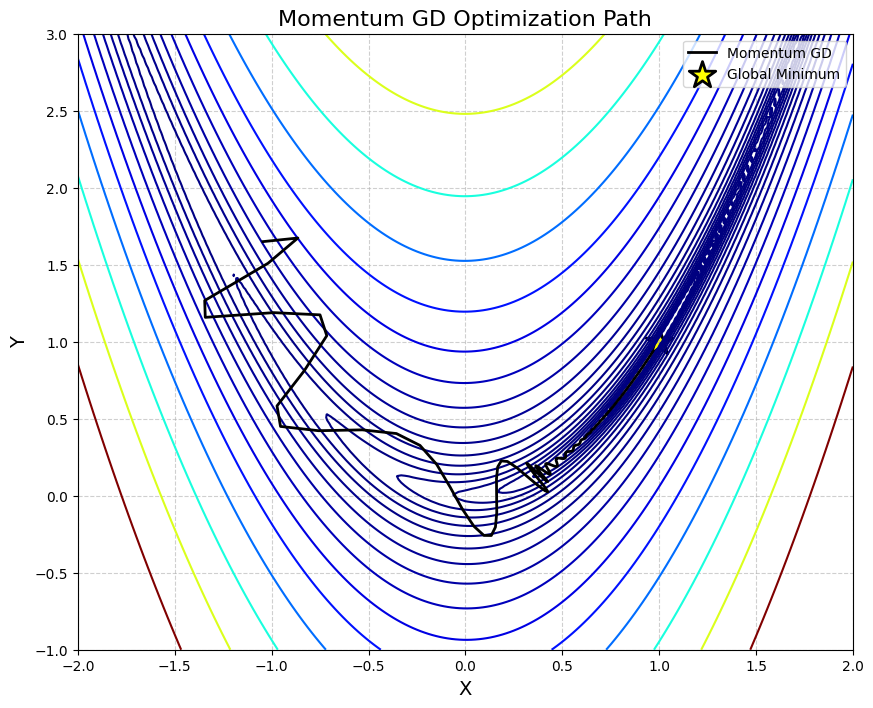

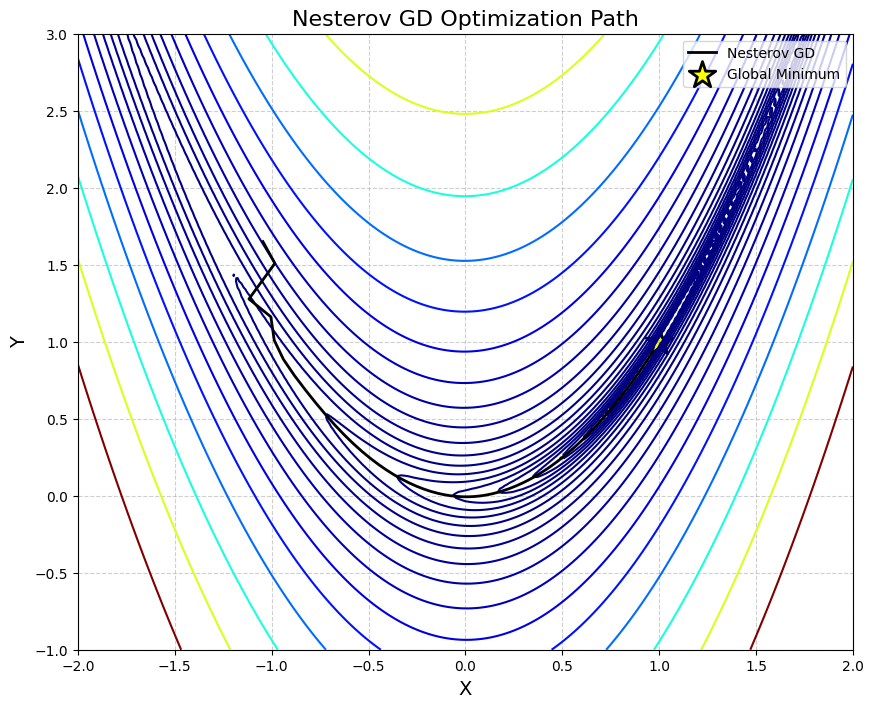

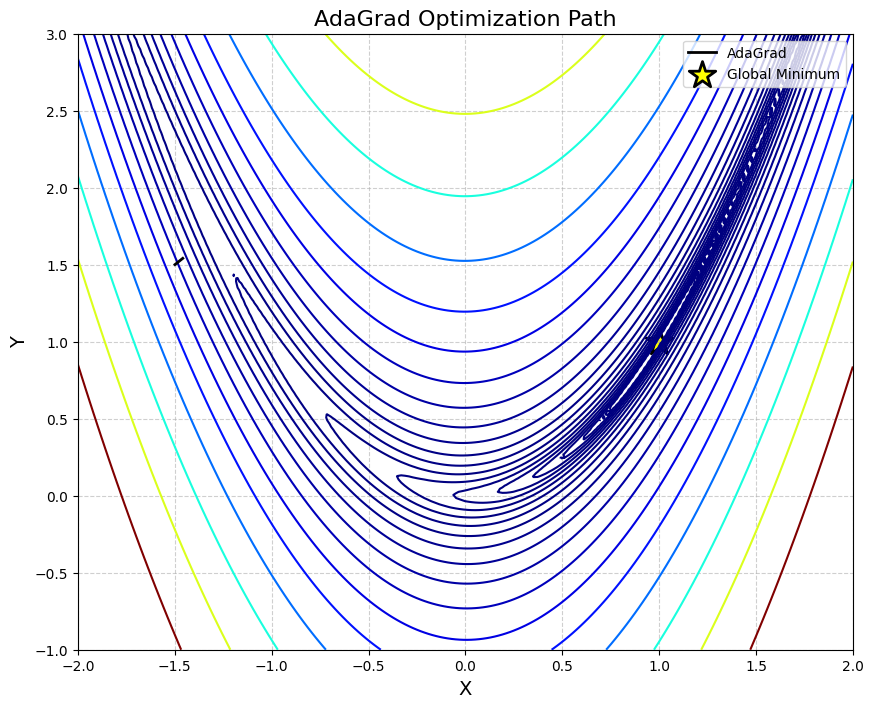

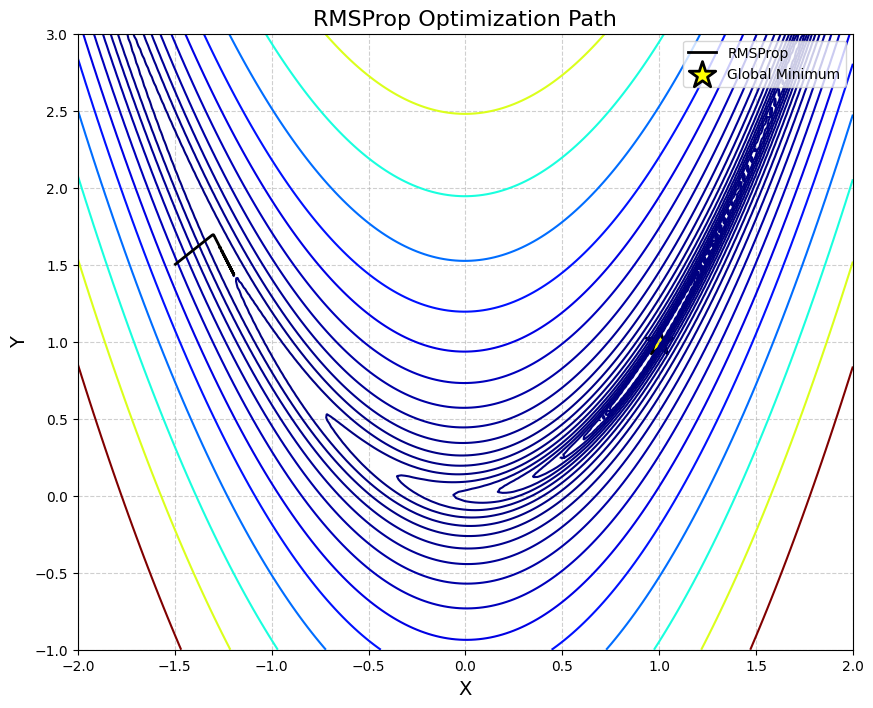

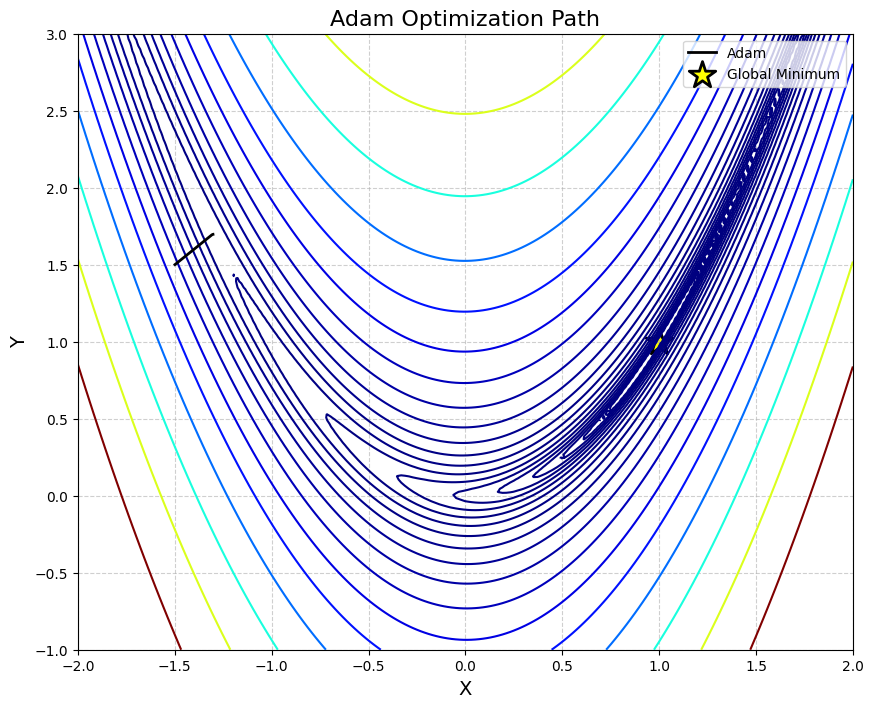

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function and its gradient
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def rosenbrock_grad(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x ** 2)
    df_dy = 200 * (y - x ** 2)
    return np.array([df_dx, df_dy])

# Optimization methods
class Optimizer:
    def __init__(self, lr=0.001, beta=0.9, iterations=500, start_point=(-1.5, 1.5)):
        self.lr = lr
        self.beta = beta
        self.iterations = iterations
        self.start_point = np.array(start_point)
        self.history = []

    def momentum_gd(self):
        x = self.start_point.copy()
        v = np.zeros_like(x)
        for _ in range(self.iterations):
            grad = rosenbrock_grad(*x)
            v = self.beta * v - self.lr * grad
            x += v
            self.history.append(x.copy())
        return x

    def nesterov_gd(self):
        x = self.start_point.copy()
        v = np.zeros_like(x)
        for _ in range(self.iterations):
            lookahead = x + self.beta * v
            grad = rosenbrock_grad(*lookahead)
            v = self.beta * v - self.lr * grad
            x += v
            self.history.append(x.copy())
        return x

    def adagrad(self):
        x = self.start_point.copy()
        G = np.zeros_like(x)
        for _ in range(self.iterations):
            grad = rosenbrock_grad(*x)
            G += grad ** 2
            x -= self.lr * grad / (np.sqrt(G) + 1e-8)
            self.history.append(x.copy())
        return x

    def rmsprop(self):
        x = self.start_point.copy()
        G = np.zeros_like(x)
        decay_rate = 0.9
        for _ in range(self.iterations):
            grad = rosenbrock_grad(*x)
            G = decay_rate * G + (1 - decay_rate) * grad ** 2
            x -= self.lr * grad / (np.sqrt(G) + 1e-8)
            self.history.append(x.copy())
        return x

    def adam(self):
        x = self.start_point.copy()
        m, v = np.zeros_like(x), np.zeros_like(x)
        beta1, beta2 = 0.9, 0.999
        epsilon = 1e-8
        for t in range(1, self.iterations + 1):
            grad = rosenbrock_grad(*x)
            m = beta1 * m + (1 - beta1) * grad
            v = beta2 * v + (1 - beta2) * (grad ** 2)
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)
            x -= self.lr * m_hat / (np.sqrt(v_hat) + epsilon)
            self.history.append(x.copy())
        return x

# Running the optimizers
optim = Optimizer()
methods = {
    "Momentum GD": optim.momentum_gd,
    "Nesterov GD": optim.nesterov_gd,
    "AdaGrad": optim.adagrad,
    "RMSProp": optim.rmsprop,
    "Adam": optim.adam
}

X, Y = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-1, 3, 200))
Z = rosenbrock(X, Y)

for method_name, method in methods.items():
    optim.history = []  # Reset history for each method
    result = method()
    path = np.array(optim.history)
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='jet')
    plt.plot(path[:, 0], path[:, 1], label=method_name, linewidth=2, color='black')
    plt.scatter(1, 1, marker='*', s=400, color='yellow', edgecolors='black', linewidth=2, label='Global Minimum')
    plt.legend()
    plt.xlabel("X", fontsize=14)
    plt.ylabel("Y", fontsize=14)
    plt.title(f"{method_name} Optimization Path", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
